In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Reading the data file and displaying the contents
rest = pd.read_csv("/content/Westlake Rest dataset.csv")
rest

,speed_of_service,variety,popularity_with_children,cleanliness,convenience,taste,price,drive_through,friendliness,quality_of_fries,taste_burgers,dollars_avg_meal,marital_status,gender,number_children,own_rent,dwelling,occupation,education,age,income
0,6.0,5.0,1.0,6.0,6.0,6.0,6.0,1.0,6.0,5.0,6.0,2.$10-$15,2.married,2.female,NaN,2.own,2.apt,9.retired,2.Some college,60 and over,NaN
1,5.0,3.0,3.0,6.0,6.0,6.0,5.0,3.0,5.0,6.0,6.0,2.$10-$15,2.married,2.female,0.0,1.rent,1.house,7.stay at home mom,2.Some college,30 and under,"$60,000 - $79,999"
2,5.0,6.0,1.0,6.0,6.0,6.0,6.0,3.0,5.0,3.0,6.0,1.Less than $10,1.single,2.female,0.0,1.rent,2.apt,8.student,2.Some college,30 and under,"$40,000 or less"
3,6.0,3.0,3.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3.$15.01-$20,2.married,2.female,2.0,2.own,1.house,7.stay at home mom,2.Some college,40-49,"$80,000 and over"
4,NaN,NaN,NaN,6.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,4.Over $20,2.married,2.female,NaN,2.own,1.house,9.retired,1.High School or less,60 and over,"$40,001 - $59,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,NaN,NaN,1.0,6.0,6.0,6.0,6.0,3.0,6.0,3.0,6.0,2.$10-$15,NaN,2.female,0.0,2.own,1.house,6.professional,2.Some college,50-59,"$60,000 - $79,999"
615,3.0,4.0,3.0,6.0,4.0,6.0,5.0,2.0,5.0,5.0,5.0,2.$10-$15,2.married,2.female,1.0,NaN,NaN,7.stay at home mom,1.High School or less,30 and under,"$40,000 or less"
616,5.0,4.0,6.0,6.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,2.$10-$15,2.married,2.female,2.0,NaN,NaN,7.stay at home mom,3.College graduate,40-49,"$80,000 and over"
617,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,4.0,6.0,1.Less than $10,2.married,2.female,1.0,NaN,NaN,7.stay at home mom,1.High School or less,30 and under,"$40,001 - $59,999"


In [ ]:
%reload_ext google.colab.data_table
rest

In [ ]:
# Checking for the missing values
rest.isnull().sum()

speed_of_service             23
variety                      26
popularity_with_children     40
cleanliness                  20
convenience                  27
taste                        23
price                        30
drive_through                32
friendliness                 30
quality_of_fries             26
taste_burgers                23
dollars_avg_meal             46
marital_status                8
gender                      101
number_children              45
own_rent                     26
dwelling                     19
occupation                   37
education                    11
age                           7
income                       44
dtype: int64

In [ ]:
# Replacing missed values with mean for continuous variables
rest['speed_of_service'] = rest['speed_of_service'].fillna((rest['speed_of_service'].mean()))
rest['variety'] = rest['variety'].fillna((rest['variety'].mean()))
rest['popularity_with_children'] = rest['popularity_with_children'].fillna((rest['popularity_with_children'].mean()))
rest['cleanliness'] = rest['cleanliness'].fillna((rest['cleanliness'].mean()))
rest['convenience'] = rest['convenience'].fillna((rest['convenience'].mean()))
rest['taste'] = rest['taste'].fillna((rest['taste'].mean()))
rest['price'] = rest['price'].fillna((rest['price'].mean()))
rest['drive_through'] = rest['drive_through'].fillna((rest['drive_through'].mean()))
rest['friendliness'] = rest['friendliness'].fillna((rest['friendliness'].mean()))
rest['quality_of_fries'] = rest['quality_of_fries'].fillna((rest['quality_of_fries'].mean()))
rest['taste_burgers'] = rest['taste_burgers'].fillna((rest['taste_burgers'].mean()))

In [ ]:
# Checking for the missing values after replacement
rest.isnull().sum()

speed_of_service              0
variety                       0
popularity_with_children      0
cleanliness                   0
convenience                   0
taste                         0
price                         0
drive_through                 0
friendliness                  0
quality_of_fries              0
taste_burgers                 0
dollars_avg_meal             46
marital_status                8
gender                      101
number_children              45
own_rent                     26
dwelling                     19
occupation                   37
education                    11
age                           7
income                       44
dtype: int64

In [ ]:
list(rest)

['speed_of_service',
 'variety',
 'popularity_with_children',
 'cleanliness',
 'convenience',
 'taste',
 'price',
 'drive_through',
 'friendliness',
 'quality_of_fries',
 'taste_burgers',
 'dollars_avg_meal',
 'marital_status',
 'gender',
 'number_children',
 'own_rent',
 'dwelling',
 'occupation',
 'education',
 'age',
 'income']

In [ ]:
 # Selecting only continuous variables
 xrd = rest[['speed_of_service',
 'variety',
 'popularity_with_children',
 'cleanliness',
 'convenience',
 'taste',
 'price',
 'drive_through',
 'friendliness',
 'quality_of_fries',
 'taste_burgers']]

In [ ]:
# Listing the selected columns of the dataset
list(xrd)

['speed_of_service',
 'variety',
 'popularity_with_children',
 'cleanliness',
 'convenience',
 'taste',
 'price',
 'drive_through',
 'friendliness',
 'quality_of_fries',
 'taste_burgers']

In [ ]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(xrd)
print(y_kmeans5)

[3 3 3 4 4 0 3 0 3 4 3 1 3 4 1 1 3 3 0 1 1 3 1 4 4 3 1 1 4 3 3 3 3 3 1 4 4
 0 1 1 1 1 3 0 1 1 3 1 3 4 0 4 3 3 1 4 4 1 3 1 4 1 3 0 3 1 2 4 2 3 0 4 0 3
 2 1 3 3 3 3 1 3 3 3 0 1 3 4 0 1 0 1 3 0 1 4 3 3 1 3 3 4 1 1 3 2 1 0 3 1 3
 3 4 0 4 3 4 3 3 3 1 3 3 2 3 0 3 0 2 4 3 4 0 4 1 4 3 1 4 1 3 0 1 3 3 1 4 3
 2 3 3 3 4 1 3 1 1 3 4 3 3 4 4 2 3 0 3 2 0 3 0 1 0 4 1 4 3 4 4 3 1 0 3 1 1
 4 3 3 3 1 4 0 0 1 1 4 1 4 4 1 4 4 3 1 0 4 3 4 3 3 3 0 0 4 1 4 1 4 4 4 3 3
 3 4 3 4 3 1 4 1 1 3 3 0 0 1 1 4 0 1 3 3 3 3 4 4 3 1 1 4 3 1 0 1 3 0 1 4 4
 0 0 4 3 1 0 0 4 4 0 0 3 1 3 3 3 4 3 1 3 3 0 2 4 0 3 3 4 0 3 1 1 1 1 3 1 4
 3 4 3 3 4 4 1 3 1 4 3 0 0 1 3 3 3 1 3 0 4 4 4 3 4 4 4 3 1 3 3 0 3 1 0 3 3
 0 1 3 2 1 3 0 2 4 1 3 3 3 3 1 3 1 1 1 2 3 2 4 2 4 4 0 3 3 1 3 4 4 0 3 0 3
 1 3 1 3 3 3 3 0 3 3 0 1 0 4 1 0 1 0 0 4 0 1 1 4 1 0 0 4 0 4 2 3 2 2 2 3 1
 0 4 4 1 0 3 3 0 0 0 2 0 2 1 1 1 3 0 3 4 0 0 1 0 3 4 3 1 0 3 3 3 3 4 0 1 0
 2 4 4 3 1 4 4 3 0 3 4 4 3 0 1 1 0 4 2 4 3 3 1 1 3 3 0 3 0 1 4 0 3 3 4 4 3
 3 3 2 0 4 2 2 0 3 3 0 1 

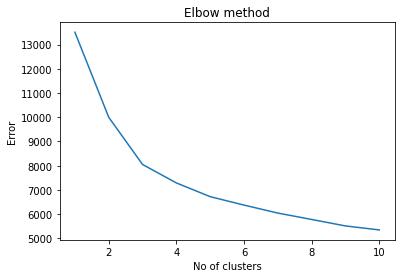

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(xrd)
    kmeans.fit(xrd)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
X = xrd
kmeans10 = KMeans(n_clusters=10)
y_kmeans10 = kmeans10.fit_predict(X)
print(y_kmeans10)

[1 6 0 6 6 0 1 5 0 2 1 4 1 2 8 4 5 5 9 8 4 1 8 2 2 9 8 4 2 1 1 0 1 5 8 8 8
 5 5 8 4 5 1 7 4 8 1 8 1 8 0 2 1 1 8 2 2 8 9 5 2 2 6 4 9 4 3 2 3 1 5 5 7 1
 3 5 1 9 6 1 8 6 1 6 9 4 1 6 7 5 5 8 5 9 8 2 6 1 4 1 0 2 8 8 6 3 5 9 1 4 0
 6 2 7 2 1 8 1 1 6 8 1 6 3 6 7 0 7 3 2 1 2 0 8 4 8 6 4 2 5 9 7 8 1 6 4 8 1
 3 5 9 1 8 8 9 8 5 0 6 0 1 6 8 3 1 9 1 3 0 1 0 8 7 2 8 2 5 2 2 9 4 7 1 8 8
 6 1 9 9 5 2 0 9 4 4 8 8 8 8 4 2 2 9 4 0 5 6 6 0 6 6 9 9 2 5 2 8 2 6 2 0 1
 1 2 9 2 6 8 2 8 8 9 6 0 5 4 8 2 7 4 5 6 5 1 2 6 5 8 5 2 5 5 7 8 9 9 8 2 2
 9 4 8 6 8 4 7 2 8 5 7 9 8 1 6 5 6 6 8 1 6 0 3 2 7 9 0 2 9 5 4 4 8 8 5 8 2
 1 2 1 5 5 2 4 9 8 2 1 9 9 8 9 6 9 4 9 0 5 2 2 1 2 2 2 1 5 6 6 9 5 4 9 6 0
 7 4 5 3 8 5 7 3 2 8 1 0 9 6 8 6 8 8 8 3 1 3 2 3 2 2 0 1 1 8 1 2 6 7 1 9 9
 4 9 4 9 1 5 1 9 1 1 7 4 0 2 5 5 5 9 0 6 7 5 8 2 8 9 0 2 5 2 3 1 3 3 3 6 4
 0 2 2 8 9 1 5 9 0 0 3 9 3 8 5 8 5 9 5 2 9 0 4 9 1 2 6 8 5 9 1 5 1 5 5 4 9
 3 2 8 6 8 2 2 6 0 5 8 5 1 0 8 8 5 2 3 2 1 6 4 8 5 1 9 1 9 5 2 9 0 5 2 2 6
 1 8 3 0 8 3 3 0 1 5 7 5 

In [ ]:
xrd['Cluster'] = kmeans5.labels_
xrd

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,speed_of_service,variety,popularity_with_children,cleanliness,convenience,taste,price,drive_through,friendliness,quality_of_fries,taste_burgers,Cluster
0,6.000000,5.000000,1.000000,6.0,6.0,6.0,6.0,1.0,6.0,5.0,6.0,3
1,5.000000,3.000000,3.000000,6.0,6.0,6.0,5.0,3.0,5.0,6.0,6.0,3
2,5.000000,6.000000,1.000000,6.0,6.0,6.0,6.0,3.0,5.0,3.0,6.0,3
3,6.000000,3.000000,3.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4
4,5.129195,4.215852,3.385147,6.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
614,5.129195,4.215852,1.000000,6.0,6.0,6.0,6.0,3.0,6.0,3.0,6.0,3
615,3.000000,4.000000,3.000000,6.0,4.0,6.0,5.0,2.0,5.0,5.0,5.0,0
616,5.000000,4.000000,6.000000,6.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,4
617,6.000000,6.000000,6.000000,6.0,6.0,6.0,6.0,6.0,1.0,4.0,6.0,4


In [ ]:
kmeans5.cluster_centers_

array([[4.70093458, 3.6862776 , 2.09636337, 5.58129593, 4.94518818,
        5.46026469, 4.47885693, 1.77041507, 3.8431049 , 3.10458464,
        4.98400552],
       [5.34265734, 4.26724372, 5.3087793 , 5.9020979 , 5.54545455,
        5.83303609, 5.23842711, 1.36763918, 5.04757382, 5.38320027,
        5.76223776],
       [2.66083413, 2.77142857, 3.10772267, 1.51428571, 1.92239382,
        1.25714286, 1.94285714, 4.21635434, 2.30865874, 2.34285714,
        1.68571429],
       [5.36708388, 4.27638404, 1.77475464, 5.89662866, 5.56244396,
        5.91939947, 5.35995623, 2.41241916, 5.10362169, 5.31257243,
        5.80374694],
       [5.54786654, 4.92396386, 5.11134982, 5.91544173, 5.75258185,
        5.94765919, 5.66782613, 4.47737566, 5.54804202, 5.40485885,
        5.85365854]])

In [ ]:
test =pd.read_csv("/content/Westlake Rest - Test Dataset.csv")
test

,id,speed_of_service,variety,popularity_with_children,cleanliness,convenience,taste,price,drive_through,friendliness,quality_of_fries,taste_burgers
0,1,6.0,6,NaN,6,6.0,6.0,6.0,4.0,6.0,6,6
1,2,6.0,6,3.0,6,6.0,6.0,6.0,3.0,NaN,5,6
2,3,6.0,6,3.0,6,6.0,6.0,6.0,1.0,6.0,6,6
3,4,6.0,4,1.0,6,6.0,6.0,6.0,3.0,4.0,4,5
4,5,6.0,6,1.0,6,6.0,6.0,6.0,3.0,6.0,6,6
5,6,5.0,4,NaN,6,NaN,6.0,3.0,NaN,NaN,5,6
6,7,4.0,4,4.0,6,6.0,6.0,6.0,1.0,6.0,6,6
7,8,6.0,4,6.0,6,4.0,6.0,6.0,3.0,6.0,6,6
8,9,6.0,6,4.0,6,6.0,6.0,6.0,3.0,6.0,6,6
9,10,4.0,3,4.0,5,1.0,6.0,4.0,1.0,5.0,5,5
